# Simulation experiment for detection thresholds for variant calling

This notebook is to get detection thresholds for the limit of the variant calling based on: 

1. Read depth
2. Error rate
3. Number of mutations

The data from this comes from: https://pubs.acs.org/doi/10.1021/acscentsci.7b00548 Ape AGW


In [1]:
import pandas as pd
# Visualisation things to make the figures look nice
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sciutil import SciUtil


data_dir = 'ePCR_data/'
fig_dir = 'ePCR_figures/'


plt.rcParams['svg.fonttype'] = 'none'
axis_line_width = 1.0
axis_font_size = 12
title_font_size = 12
label_font_size = 10
figsize = (5, 4) # Figure size
font = 'Arial'
style = 'ticks'
font_family = 'sans-serif'

# Create a figure with 2x2 subplots
sns.set_style("whitegrid")
cmap = 'viridis'
palette = sns.color_palette("viridis", as_cmap=True)
sns.set_palette(cmap)

sns.set(rc={'figure.figsize': figsize, 'font.family': font_family,
            'font.sans-serif': font, 'font.size': label_font_size}, style=style)

def set_ax_params(ax):
    ax.tick_params(direction='out', length=2, width=axis_line_width)
    ax.spines['bottom'].set_linewidth(axis_line_width)
    ax.spines['top'].set_linewidth(0)
    ax.spines['left'].set_linewidth(axis_line_width)
    ax.spines['right'].set_linewidth(0)
    ax.tick_params(labelsize=axis_font_size)
    ax.tick_params(axis='x', which='major', pad=2.0)
    ax.tick_params(axis='y', which='major', pad=2.0)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    ax.tick_params(labelsize=label_font_size)


u = SciUtil()

# Generate mutations on a "real" sequence
# Decided to choose tauD from Ecoli K12

parent_sequence_aa = 'MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEKDVMYLKKACDVLKDQVDEILDLAGGWVASNEHLIYYFSNPDTGEPIKEYLERVRARFGAWILDTTCRDYNREWLDYQYEVGLRHHRSKKGVTDGVRTVPHIPLRYLIAWIYPITATIKPFLAKKGGSPEDIEGMYNAWFKSVVLQVAIWSHPYTKENDWLEHHHHHH*'

parent_sequence = 'ATGACTCCCTCGGACATCCCGGGATATGATTATGGGCGTGTCGAGAAGTCACCCATCACGGACCTTGAGTTTGACCTTCTGAAGAAGACTGTCATGTTAGGTGAAAAGGACGTAATGTACTTGAAAAAGGCGTGTGACGTTCTGAAAGATCAAGTTGATGAGATCCTTGACTTGGCGGGTGGTTGGGTAGCATCAAATGAGCATTTGATTTATTACTTCTCCAATCCGGATACAGGAGAGCCTATTAAGGAATACCTGGAACGTGTACGCGCTCGCTTTGGAGCCTGGATTCTGGACACTACCTGCCGCGACTATAACCGTGAATGGTTAGACTACCAGTACGAAGTTGGGCTTCGTCATCACCGTTCAAAGAAAGGGGTCACAGACGGAGTACGCACCGTGCCCCATATCCCACTTCGTTATCTTATCGCATGGATCTATCCTATCACCGCCACTATCAAGCCATTTTTGGCTAAGAAAGGTGGCTCTCCGGAAGACATCGAAGGGATGTACAACGCTTGGTTCAAGTCTGTAGTTTTACAAGTTGCCATCTGGTCACACCCTTATACTAAGGAGAATGACTGGCTCGAGCACCACCACCACCACCACTGA'

# Introduce mutations at a given frequency and an error rate

Test setup:

Change to 0.1 - 5% 0.2% step size. 

1. For number of mutations from 1 to the sequence length test mutating each one and correlate this to the p value
2. For sequencing error rates from 0 to 100% make sequences ranging with this and see what the results are for the p value and the error
3. For different sequence lengths also check how sequence length corresponds to the pvalue

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
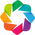

In [2]:
from minION import *
from tqdm import tqdm

label = 'ApeAGW'

## Experiment 1: Varying the sequencing error rate for a single mutation

In [3]:
# We're going to make an experiment of 10 plates with different sequencing error rates
read_depth = 25
number_of_wells = 96
epcr_mutation_rate = 0.02
frequency_cutoff = 0.5
library_number = 96 # Usually do a 96 well plate
verbose = False
sequencing_error = 0.1

experiment_df = pd.DataFrame()
for sequencing_error in range(0, 50, 5):
    sequencing_error_rate = sequencing_error/100.0
    run_df = make_experiment(f'SeqError_{sequencing_error}', read_depth, sequencing_error_rate, parent_sequence,
                             library_number, number_of_wells, epcr_mutation_rate, frequency_cutoff)
    run_df.reset_index(inplace=True)
    experiment_df = pd.concat([experiment_df, run_df])

# Also plot each one
experiment_df.to_csv(f'{data_dir}Experiment1.csv', index=False)

  1%|█▋                                                                                                                                                                    | 1/96 [00:00<00:17,  5.36it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.40986928104575165
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4084967320261438
-----------------------------------------


  4%|██████▉                                                                                                                                                               | 4/96 [00:00<00:15,  5.76it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4137254901960784
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.40934640522875815
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4103921568627451
-----------------------------------------


  6%|██████████▍                                                                                                                                                           | 6/96 [00:01<00:16,  5.58it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4156862745098039
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4054248366013072
-----------------------------------------


  8%|█████████████▊                                                                                                                                                        | 8/96 [00:01<00:15,  5.55it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4025490196078432
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.41431372549019607
-----------------------------------------


 10%|█████████████████▏                                                                                                                                                   | 10/96 [00:01<00:15,  5.46it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4122222222222222
-----------------------------------------


 11%|██████████████████▉                                                                                                                                                  | 11/96 [00:02<00:16,  5.29it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.41398692810457516
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4092156862745098
-----------------------------------------


 15%|████████████████████████                                                                                                                                             | 14/96 [00:02<00:14,  5.54it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.41130718954248363
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4122875816993464
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4087581699346405
-----------------------------------------


 17%|███████████████████████████▌                                                                                                                                         | 16/96 [00:02<00:13,  5.78it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.40816993464052287
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.41594771241830064
-----------------------------------------


 20%|████████████████████████████████▋                                                                                                                                    | 19/96 [00:03<00:13,  5.85it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4197385620915033
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4079738562091503
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4016993464052287
-----------------------------------------


 23%|█████████████████████████████████████▊                                                                                                                               | 22/96 [00:03<00:13,  5.54it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.41522875816993454
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.41183006535947714
-----------------------------------------


 25%|█████████████████████████████████████████▎                                                                                                                           | 24/96 [00:04<00:12,  5.76it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.41398692810457516
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4169934640522876
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4191503267973857
-----------------------------------------


 27%|████████████████████████████████████████████▋                                                                                                                        | 26/96 [00:04<00:12,  5.76it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.41032679738562094
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4141830065359477
-----------------------------------------


 30%|█████████████████████████████████████████████████▊                                                                                                                   | 29/96 [00:05<00:12,  5.50it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4166666666666667
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4131372549019608
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4075816993464052
-----------------------------------------


 32%|█████████████████████████████████████████████████████▎                                                                                                               | 31/96 [00:05<00:11,  5.67it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.41398692810457516
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4137254901960784
-----------------------------------------


 34%|████████████████████████████████████████████████████████▋                                                                                                            | 33/96 [00:05<00:11,  5.69it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4077124183006536
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4097385620915033
-----------------------------------------


 36%|████████████████████████████████████████████████████████████▏                                                                                                        | 35/96 [00:06<00:11,  5.49it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.41660130718954247
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4077777777777778
-----------------------------------------


 39%|███████████████████████████████████████████████████████████████▌                                                                                                     | 37/96 [00:06<00:10,  5.45it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.40803921568627444
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.40738562091503266
-----------------------------------------


 42%|████████████████████████████████████████████████████████████████████▊                                                                                                | 40/96 [00:07<00:10,  5.58it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.41117647058823525
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4133986928104575
-----------------------------------------


 44%|████████████████████████████████████████████████████████████████████████▏                                                                                            | 42/96 [00:07<00:09,  5.69it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.40823529411764703
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.40810457516339865
-----------------------------------------


 46%|███████████████████████████████████████████████████████████████████████████▋                                                                                         | 44/96 [00:07<00:09,  5.46it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4125490196078431
-----------------------------------------


 47%|█████████████████████████████████████████████████████████████████████████████▎                                                                                       | 45/96 [00:08<00:10,  4.99it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.41274509803921566
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.41202614379084973
-----------------------------------------


 49%|████████████████████████████████████████████████████████████████████████████████▊                                                                                    | 47/96 [00:08<00:09,  5.41it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.40816993464052287
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4130718954248366
-----------------------------------------


 51%|████████████████████████████████████████████████████████████████████████████████████▏                                                                                | 49/96 [00:08<00:08,  5.62it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4123529411764706
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4049019607843137
-----------------------------------------


 54%|█████████████████████████████████████████████████████████████████████████████████████████▍                                                                           | 52/96 [00:09<00:07,  5.74it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.40738562091503266
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.40843137254901957
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.40738562091503266
-----------------------------------------


 56%|████████████████████████████████████████████████████████████████████████████████████████████▊                                                                        | 54/96 [00:09<00:07,  5.53it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4090849673202614
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.41241830065359475
-----------------------------------------


 58%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                    | 56/96 [00:10<00:07,  5.48it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.40941176470588236
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4107843137254902
-----------------------------------------


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                 | 58/96 [00:10<00:06,  5.43it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4111111111111111
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.40633986928104576
-----------------------------------------


 62%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                             | 60/96 [00:10<00:06,  5.49it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4047712418300653
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4088235294117647
-----------------------------------------


 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                        | 63/96 [00:11<00:06,  5.39it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.41287581699346404
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.41294117647058826
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4035294117647059
-----------------------------------------


 68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                     | 65/96 [00:11<00:05,  5.37it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4106535947712418
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.40732026143790845
-----------------------------------------


 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                 | 67/96 [00:12<00:05,  5.62it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4101960784313725
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.41477124183006536
-----------------------------------------


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                            | 70/96 [00:12<00:04,  5.77it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.41431372549019607
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4120261437908497
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.41836601307189536
-----------------------------------------


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                         | 72/96 [00:13<00:04,  5.83it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.41209150326797384
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4105228758169935
-----------------------------------------


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 74/96 [00:13<00:03,  5.63it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.40169934640522875
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4137254901960784
-----------------------------------------


 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 76/96 [00:13<00:03,  5.80it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.41124183006535947
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4091503267973856
-----------------------------------------


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                               | 78/96 [00:14<00:03,  5.58it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.40856209150326794
-----------------------------------------


 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 79/96 [00:14<00:03,  5.41it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4047058823529412
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.41071895424836596
-----------------------------------------


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 81/96 [00:14<00:02,  5.48it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4026797385620915
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.40352941176470586
-----------------------------------------


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 83/96 [00:15<00:02,  5.46it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.417516339869281
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.40398692810457515
-----------------------------------------


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 85/96 [00:15<00:02,  5.42it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4089542483660131
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.406078431372549
-----------------------------------------


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 87/96 [00:15<00:01,  5.45it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4061437908496732
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4108496732026144
-----------------------------------------


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 89/96 [00:16<00:01,  5.43it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4023529411764706
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.41699346405228754
-----------------------------------------


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 92/96 [00:16<00:00,  5.68it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.40986928104575165
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.40045751633986926
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.41183006535947714
-----------------------------------------


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 94/96 [00:17<00:00,  5.52it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.40875816993464054
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4126797385620915
-----------------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 96/96 [00:17<00:00,  5.50it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.41490196078431374
-----------------------------------------



  1%|█▋                                                                                                                                                                    | 1/96 [00:00<00:17,  5.35it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.46385620915032677
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.45823529411764713
-----------------------------------------


  3%|█████▏                                                                                                                                                                | 3/96 [00:00<00:16,  5.77it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4535294117647059
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.45895424836601306
-----------------------------------------


  5%|████████▋                                                                                                                                                             | 5/96 [00:00<00:15,  5.83it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.46333333333333343
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.46372549019607845
-----------------------------------------


  7%|████████████                                                                                                                                                          | 7/96 [00:01<00:16,  5.53it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.45895424836601306
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4583006535947713
-----------------------------------------


  9%|███████████████▌                                                                                                                                                      | 9/96 [00:01<00:15,  5.72it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4613725490196078
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4498039215686274
-----------------------------------------


 11%|██████████████████▉                                                                                                                                                  | 11/96 [00:01<00:14,  5.82it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.46261437908496733
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.45614379084967316
-----------------------------------------


 14%|██████████████████████▎                                                                                                                                              | 13/96 [00:02<00:14,  5.58it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4559477124183006
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.46444444444444444
-----------------------------------------


 16%|█████████████████████████▊                                                                                                                                           | 15/96 [00:02<00:14,  5.75it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4581045751633987
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4625490196078432
-----------------------------------------


 19%|██████████████████████████████▉                                                                                                                                      | 18/96 [00:03<00:15,  5.03it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.45777777777777784
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4535294117647059
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.45385620915032676
-----------------------------------------


 22%|████████████████████████████████████                                                                                                                                 | 21/96 [00:03<00:14,  5.16it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4632679738562091
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.45267973856209154
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.45405228758169935
-----------------------------------------


 24%|███████████████████████████████████████▌                                                                                                                             | 23/96 [00:04<00:14,  5.16it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.45712418300653596
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4563398692810458
-----------------------------------------


 27%|████████████████████████████████████████████▋                                                                                                                        | 26/96 [00:04<00:13,  5.36it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4652287581699347
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.45869281045751636
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.45307189542483656
-----------------------------------------


 29%|████████████████████████████████████████████████▏                                                                                                                    | 28/96 [00:05<00:12,  5.34it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.46196078431372556
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4635294117647059
-----------------------------------------


 31%|███████████████████████████████████████████████████▌                                                                                                                 | 30/96 [00:05<00:11,  5.63it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.46477124183006546
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4577124183006536
-----------------------------------------


 34%|████████████████████████████████████████████████████████▋                                                                                                            | 33/96 [00:06<00:11,  5.70it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4686928104575164
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.46464052287581703
-----------------------------------------


 35%|██████████████████████████████████████████████████████████▍                                                                                                          | 34/96 [00:06<00:11,  5.45it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.46614379084967317
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4632679738562091
-----------------------------------------


 39%|███████████████████████████████████████████████████████████████▌                                                                                                     | 37/96 [00:06<00:10,  5.65it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4555555555555555
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.44679738562091503
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4556862745098039
-----------------------------------------


 41%|███████████████████████████████████████████████████████████████████                                                                                                  | 39/96 [00:07<00:09,  5.77it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.45751633986928103
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.462156862745098
-----------------------------------------


 44%|████████████████████████████████████████████████████████████████████████▏                                                                                            | 42/96 [00:07<00:09,  5.75it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.47196078431372546
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4582352941176471
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4572549019607844
-----------------------------------------


 46%|███████████████████████████████████████████████████████████████████████████▋                                                                                         | 44/96 [00:08<00:09,  5.54it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4650326797385621
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4522875816993464
-----------------------------------------


 49%|████████████████████████████████████████████████████████████████████████████████▊                                                                                    | 47/96 [00:08<00:08,  5.66it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.46189542483660134
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4575816993464052
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4552941176470588
-----------------------------------------


 51%|████████████████████████████████████████████████████████████████████████████████████▏                                                                                | 49/96 [00:08<00:08,  5.71it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4639869281045752
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4560130718954249
-----------------------------------------


 53%|███████████████████████████████████████████████████████████████████████████████████████▋                                                                             | 51/96 [00:09<00:08,  5.38it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.46437908496732033
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.46104575163398687
-----------------------------------------


 55%|███████████████████████████████████████████████████████████████████████████████████████████                                                                          | 53/96 [00:09<00:07,  5.42it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.46267973856209155
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.46058823529411763
-----------------------------------------


 57%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                      | 55/96 [00:10<00:07,  5.39it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4597385620915032
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.45549019607843133
-----------------------------------------


 59%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                   | 57/96 [00:10<00:06,  5.63it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4650326797385621
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.45509803921568626
-----------------------------------------


 61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                               | 59/96 [00:10<00:06,  5.77it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4534640522875817
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.45790849673202616
-----------------------------------------


 64%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                            | 61/96 [00:11<00:06,  5.61it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4554248366013072
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4591503267973856
-----------------------------------------


 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                        | 63/96 [00:11<00:05,  5.63it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4615032679738562
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4562745098039216
-----------------------------------------


 68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                     | 65/96 [00:11<00:05,  5.74it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.45888888888888896
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.45169934640522874
-----------------------------------------


 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                 | 67/96 [00:12<00:05,  5.75it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.46509803921568627
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.45385620915032676
-----------------------------------------


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                            | 70/96 [00:12<00:04,  5.28it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4684313725490196
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4556209150326797
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4550326797385621
-----------------------------------------


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                         | 72/96 [00:13<00:04,  5.43it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.455359477124183
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.45777777777777773
-----------------------------------------


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 74/96 [00:13<00:03,  5.70it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4665359477124183
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.45647058823529413
-----------------------------------------


 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 76/96 [00:13<00:03,  5.54it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.45856209150326793
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4622222222222222
-----------------------------------------


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                               | 78/96 [00:14<00:03,  5.45it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4635294117647059
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4554248366013071
-----------------------------------------


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 81/96 [00:14<00:02,  5.68it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.45300653594771245
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4587581699346405
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4552287581699347
-----------------------------------------


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 83/96 [00:15<00:02,  5.80it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4652287581699347
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4613071895424837
-----------------------------------------


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 85/96 [00:15<00:02,  5.14it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4508496732026143
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.46366013071895423
-----------------------------------------


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 88/96 [00:16<00:01,  5.24it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4581045751633987
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4559477124183007
-----------------------------------------


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 90/96 [00:16<00:01,  5.54it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.44509803921568625
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4541830065359477
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4615032679738562
-----------------------------------------


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 93/96 [00:16<00:00,  5.71it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4516339869281045
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4569934640522876
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4662745098039216
-----------------------------------------


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 95/96 [00:17<00:00,  5.50it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4605228758169935
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4567320261437908
-----------------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 96/96 [00:17<00:00,  5.48it/s]


## Experiment 2: varying read depth and it's effect on significance

In [ ]:
# We're going to make an experiment of 10 plates with different sequencing error rates
read_depth = 25
number_of_wells = 96
epcr_mutation_rate = 0.02
frequency_cutoff = 0.5
library_number = 96 # Usually do a 96 well plate
verbose = False
sequencing_error = 0.1

# Here we do it from 1-10 completely and then in intervals of 10 so that we can clearly see the impact
experiment_df = pd.DataFrame()
for read_depth in range(1, 10, 1):
    run_df = make_experiment(f'ReadDepth_{read_depth}', read_depth, sequencing_error, parent_sequence, 
                     library_number, number_of_wells, epcr_mutation_rate, frequency_cutoff)
    run_df.reset_index(inplace=True)
    experiment_df = pd.concat([experiment_df, run_df])

for read_depth in range(10, 100, 5):
    run_df = make_experiment(f'ReadDepth_{read_depth}', read_depth, sequencing_error, parent_sequence, 
                     library_number, number_of_wells, epcr_mutation_rate, frequency_cutoff)
    run_df.reset_index(inplace=True)
    experiment_df = pd.concat([experiment_df, run_df])

 # Also plot each one
experiment_df.to_csv(f'{data_dir}Experiment2_ReadDepth_{label}.csv', index=False)

 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                 | 67/96 [00:11<00:04,  5.84it/s]

## Experiment 3: effect of sequence length on significance


In [ ]:
# We're going to make an experiment of 10 plates with different sequencing error rates
read_depth = 25
number_of_wells = 96
epcr_mutation_rate = 0.02
frequency_cutoff = 0.5
library_number = 96 # Usually do a 96 well plate
verbose = False
sequencing_error = 0.1


experiment_df = pd.DataFrame()
for seq_len in range(5, 2000, 50):
    if seq_len >= len(parent_sequence):
        break
    run_df = make_experiment(f'SeqLen_{seq_len}', read_depth, sequencing_error, parent_sequence[:seq_len*3],
             library_number, number_of_wells, epcr_mutation_rate, frequency_cutoff)
    run_df.reset_index(inplace=True)
    experiment_df = pd.concat([experiment_df, run_df])

# Also plot each one
experiment_df.to_csv(f'{data_dir}Experiment3_{label}.csv', index=False)


In [ ]:
experiment_df

## Experiment 4: effect of frequency cutoff

In [ ]:
# We're going to make an experiment of 10 plates with different sequencing error rates
read_depth = 25
number_of_wells = 96
epcr_mutation_rate = 0.02
frequency_cutoff = 0.5
library_number = 96 # Usually do a 96 well plate
verbose = False
sequencing_error = 0.1

experiment_df = pd.DataFrame()
for frequency_cutoff in range(5, 100, 10):
    run_df = make_experiment(f'FreqCutoff_{frequency_cutoff}', read_depth, sequencing_error, parent_sequence, library_number, number_of_wells, epcr_mutation_rate, frequency_cutoff/100.0)
    run_df.reset_index(inplace=True)
    experiment_df = pd.concat([experiment_df, run_df])

 # Also plot each one
experiment_df.to_csv(f'{data_dir}Experiment4_{label}.csv', index=False)

## Experiment 5: ePCR mutation rate

In [ ]:
# We're going to make an experiment of 10 plates with different sequencing error rates
read_depth = 25
number_of_wells = 96
epcr_mutation_rate = 0.02
frequency_cutoff = 0.5
library_number = 96 # Usually do a 96 well plate
verbose = False
sequencing_error = 0.1


experiment_df = pd.DataFrame()
for epcr_mutation_rate in range(1, 20, 2):
    run_df = make_experiment(f'ePCR_{epcr_mutation_rate}', read_depth, sequencing_error, parent_sequence, library_number, number_of_wells, 
                             epcr_mutation_rate/1000.0, frequency_cutoff)
    run_df.reset_index(inplace=True)
    experiment_df = pd.concat([experiment_df, run_df])

 # Also plot each one
experiment_df.to_csv(f'{data_dir}Experiment5_{label}.csv', index=False)


## Experiment 6: mixed well rates


In [ ]:
# We're going to make an experiment of 10 plates with different sequencing error rates
read_depth = 25
number_of_wells = 96
epcr_mutation_rate = 0.02
frequency_cutoff = 0.5
library_number = 96 # Usually do a 96 well plate
verbose = False
sequencing_error = 0.1
number_wells_to_mix = 20
experiment_df = pd.DataFrame()

for mixture_rate in range(10, 90, 10):
    run_df = make_experiment(f'mixedWells_{mixture_rate}', read_depth, sequencing_error, parent_sequence, library_number, number_of_wells, 
                             epcr_mutation_rate, frequency_cutoff, number_wells_to_mix, mixture_rate/100.0, 
                             qc_files_path='qc_data/')
    run_df.reset_index(inplace=True)
    experiment_df = pd.concat([experiment_df, run_df])

 # Also plot each one
experiment_df.to_csv(f'{data_dir}Experiment6_{label}.csv', index=False)


In [ ]:
# We're going to make an experiment of 10 plates with different sequencing error rates
read_depth = 25
number_of_wells = 96
epcr_mutation_rate = 0.02
frequency_cutoff = 0.2
library_number = 96 # Usually do a 96 well plate
verbose = False
sequencing_error = 0.1
number_wells_to_mix = 20
experiment_df = pd.DataFrame()

for mixture_rate in range(10, 90, 10):
    run_df = make_experiment(f'mixedWells_{mixture_rate}', read_depth, sequencing_error, parent_sequence, library_number, number_of_wells, 
                             epcr_mutation_rate, frequency_cutoff, number_wells_to_mix, mixture_rate/100.0, 
                             qc_files_path='qc_data/')
    run_df.reset_index(inplace=True)
    experiment_df = pd.concat([experiment_df, run_df])

 # Also plot each one
experiment_df.to_csv(f'{data_dir}Experiment6_freq_0.2_{label}.csv', index=False)
